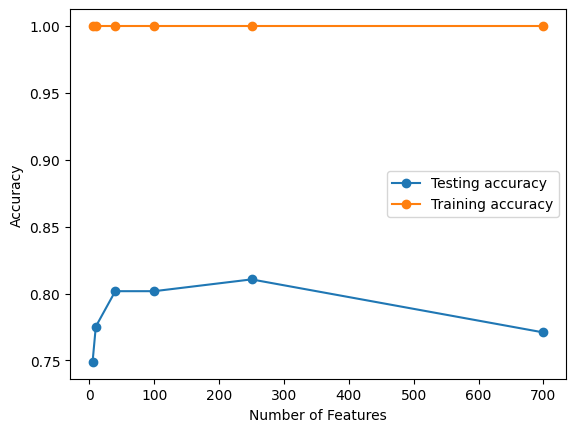

In [13]:
from matplotlib import markers
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


num_feat = [5, 10, 40, 100, 250, 700]
test_acc = []
train_acc = []

data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
X = df.drop('class', axis=1)
y = df['class']

for i in num_feat:
    X_new = SelectKBest(mutual_info_classif, k=i).fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size = 0.7,random_state = 1)
    classifier = DecisionTreeClassifier()
    classifier = classifier.fit(X_train, y_train)

    pred = classifier.predict(X_test)
    test_acc.append(metrics.accuracy_score(y_test, pred))
    train_acc.append(classifier.score(X_train, y_train))

fig, ax = plt.subplots()

ax.plot(num_feat, test_acc, marker='o', label='Testing accuracy')
ax.plot(num_feat, train_acc, marker='o', label='Training accuracy')
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.legend()

plt.show()




### 